### Customizing Edge Curves

This notebook demonstrates several ways to change how one draws hive plot edges through the `HivePlot.connect_axes()` method call.

In [1]:
import matplotlib.pyplot as plt
from flexitext import flexitext
from hiveplotlib import Axis, HivePlot, hive_plot_n_axes
from hiveplotlib.datasets import example_nodes_and_edges
from hiveplotlib.viz import edge_viz, hive_plot_viz

#### Short vs Long Arc

By default, `hiveplotlib` draws edges between two axes using the *short angle* between two axes. There are, however, two ways to draw these edges, since one could draw the edges along the short angle $\theta$ *or* along the long angle $360 - \theta$.

Below, we demonstrate calling `HivePlot.connect_axes()` using both the default `short_arc=True` behavior as well as the optional `short_arc=False` option.

In [2]:
# generate some example nodes and edges for axes
num_axes = 2
nodes, node_splits, edges = example_nodes_and_edges(num_axes=num_axes)

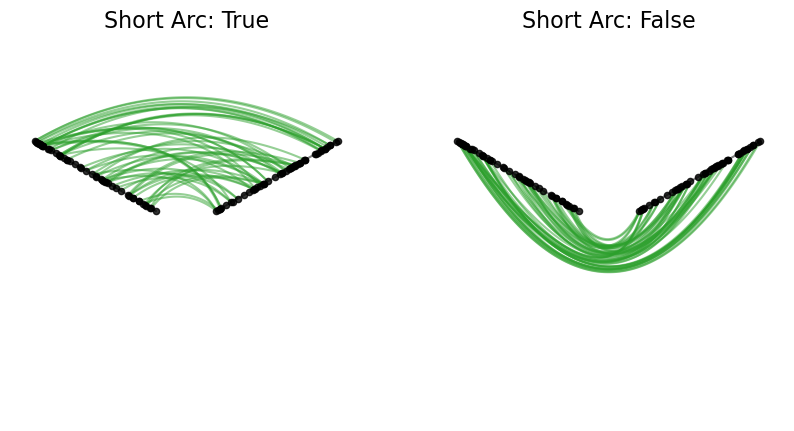

In [3]:
hp = HivePlot()
hp.add_nodes(nodes)

for i in range(num_axes):
    temp_axis = Axis(
        axis_id=i,
        start=1,
        end=5,
        angle=30 + 120 * i,
        long_name=f"Axis {i}",
    )
    hp.add_axes(temp_axis)
    hp.place_nodes_on_axis(
        axis_id=i,
        unique_ids=node_splits[i],
        sorting_feature_to_use="low",
    )

# plot both short arc and long arc
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, short_arc in enumerate([True, False]):
    # make a copy of hive plot to make sure we draw edges on different HPs
    temp_hp = hp.copy()

    # manually connect our 2 axes
    temp_hp.connect_axes(
        edges=edges,
        axis_id_1=0,
        axis_id_2=1,
        a2_to_a1=False,
        color="C2",
        short_arc=short_arc,
    )

    hive_plot_viz(
        temp_hp,
        show_axes_labels=False,
        fig=fig,
        ax=axes[i],
    )
    axes[i].set_title(f"Short Arc: {short_arc}", size=16)

plt.show()

##### When Would One Use This?

A simple situation when one might use `short_arc=False` is when the short arc and long arc are equal i.e. we have two axes 180 degrees apart.

Below, we contrive such a 2-axis example of communication between two groups. Specifically, communication is greater between the two groups in one direction relative to the other.

In our hive plot below, we use the full 360 degrees of hive plot real estate by plotting edges going from the first axis to the second axis on one side of the hive plot (`short_arc=True`). Edges going in the opposite direction are restricted to the other side of the hive plot (`short_arc=False`).

The resulting hive plot quickly and simply demonstrates the imbalance in who more frequently initiates communication between the two groups. 

In [4]:
# generate some example nodes and edges for axes
num_axes = 2
nodes, node_splits, edges = example_nodes_and_edges(num_axes=num_axes)

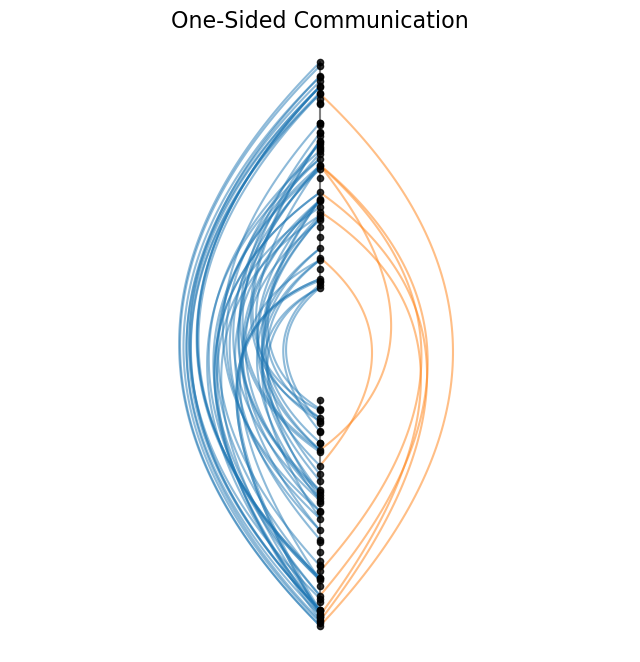

In [5]:
hp = HivePlot()
hp.add_nodes(nodes)

for i in range(num_axes):
    temp_axis = Axis(
        axis_id=i,
        start=1,
        end=5,
        angle=90 + 180 * i,
        long_name=f"Axis {i}",
    )
    hp.add_axes(temp_axis)
    hp.place_nodes_on_axis(
        axis_id=i,
        unique_ids=node_splits[i],
        sorting_feature_to_use="low",
    )

# manually connect our 2 axes, but with different arc for different direction edges
hp.connect_axes(
    edges=edges,
    axis_id_1=0,
    axis_id_2=1,
    a2_to_a1=False,
    color="C0",
)
# purposely subset one direction of edges to show
#  how this figure can nicely show a difference in quantity of edges by direction
hp.connect_axes(
    edges=edges[:30, :],
    axis_id_1=0,
    axis_id_2=1,
    a1_to_a2=False,
    color="C1",
    short_arc=False,
)

fig, ax = hive_plot_viz(hp, show_axes_labels=False, figsize=(8, 8))
ax.set_title("One-Sided Communication", size=16)

plt.show()

#### Move Bézier Control Point Closer to or Further from Origin

By default, an edge in `hiveplotlib` is drawn between its associated start and end nodes with a [Bézier curve](https://en.wikipedia.org/wiki/B%C3%A9zier_curve) with a single *control point* at the median polar coordinate of the start and end nodes. One may want to alter this curvature by _shifting the control point **closer to or further from** the origin_.

This capability can be changed via the `control_rho_scale` parameter in `hiveplotlib.HivePlot.connect_axes()`. This parameter scales out (or in) the single control point for each curve relative to the origin.

A value greater than 1 will move the edges away from the origin, making them more curvy than the default edges, while a value between 0 and 1 will move the edges closer to the origin, making them less curvy than the default, and eventually concave rather than convex with a low enough value.

Below, we demonstrate calling `hiveplotlib.HivePlot.connect_axes()` using multiple values for `control_rho_scale` between 0 and 2. We also include the default edges on each hive plot as a point of comparison.

In [6]:
# generate some example nodes and edges for axes
num_axes = 2
nodes, node_splits, edges = example_nodes_and_edges(num_axes=num_axes)

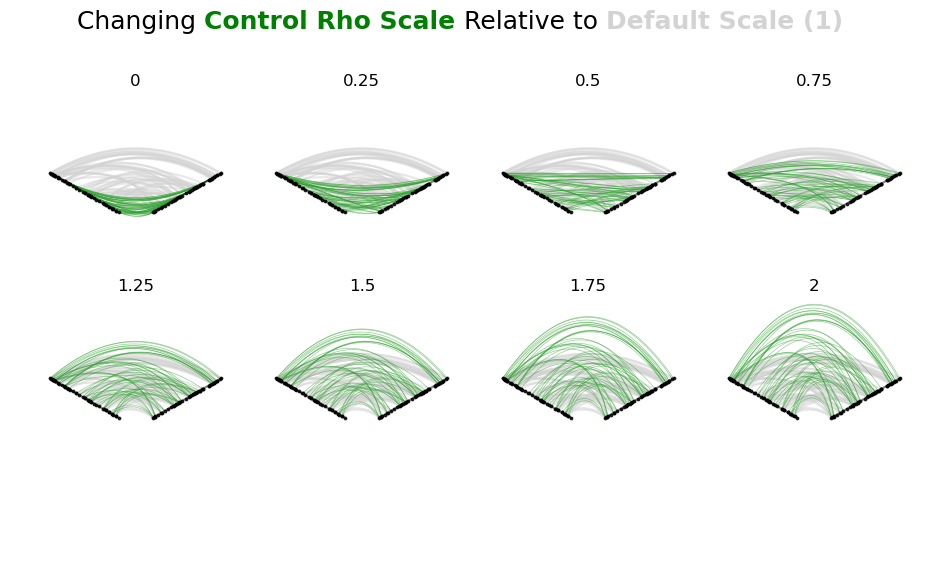

In [7]:
hp = HivePlot()
hp.add_nodes(nodes)

for i in range(num_axes):
    temp_axis = Axis(
        axis_id=i,
        start=1,
        end=5,
        angle=30 + 120 * i,
        long_name=f"Axis {i}",
    )
    hp.add_axes(temp_axis)
    hp.place_nodes_on_axis(
        axis_id=i,
        unique_ids=node_splits[i],
        sorting_feature_to_use="low",
    )

fig, axes = plt.subplots(2, 4, figsize=(12, 6))

# make default hp curves first
default_hp = hp.copy()

# manually connect our 2 axes
default_hp.connect_axes(
    edges=edges,
    axis_id_1=0,
    axis_id_2=1,
    a2_to_a1=False,
    color="lightgray",
    alpha=0.5,
)

control_rho_scales = [0, 0.25, 0.5, 0.75, 1.25, 1.5, 1.75, 2]

for i, control_rho_scale in enumerate(control_rho_scales):
    # make a copy of hive plot to make sure we draw edges on different HPs
    temp_hp = hp.copy()

    # manually connect our 2 axes
    temp_hp.connect_axes(
        edges=edges,
        axis_id_1=0,
        axis_id_2=1,
        a2_to_a1=False,
        color="C2",
        control_rho_scale=control_rho_scale,
    )
    # plot default edges in gray
    edge_viz(
        default_hp,
        fig=fig,
        ax=axes.flatten()[i],
    )
    # plot rho-scaled edges on top
    hive_plot_viz(
        temp_hp,
        show_axes_labels=False,
        fig=fig,
        ax=axes.flatten()[i],
        lw=0.5,
        buffer=0.3,
        node_kwargs={"s": 3},
    )
    axes.flatten()[i].set_title(f"{control_rho_scale}", size=12)

# embed legend in the title
flexitext(
    x=0.5,
    y=1,
    s="<size:18>Changing <color:green, weight: bold>Control Rho Scale</> "
    "Relative to <color:lightgray, weight:bold>Default Scale (1)</></>",
    xycoords="figure fraction",
    ha="center",
)

fig.subplots_adjust(hspace=-0.2, wspace=-0.1)

plt.show()

##### When Would One Use This?

A situation when this capability becomes not only relevant, but *necessary* would be when we move to *multiple layers* of hive plot axes, which can cause overlapping (and therefore indistinguishable) edges when drawn with default rho values.

Below, we contrive an example of this with a standard 3-axis hive plot plus an outer axis misaligned to the angles of any of the inner axes.

We highlight in purple the edge curves that overlap other edges with the default rho value.

We then demonstrate scaling up the rho value for the purple edges. This results in the purples edges no longer traversing over an inner axis, thus allowing us to look at six pairs of edge relationships in one figure with minimal overlap. 

In [8]:
# generate some example nodes and edges for axes
num_axes = 4
nodes, node_splits, edges = example_nodes_and_edges(num_axes=num_axes)

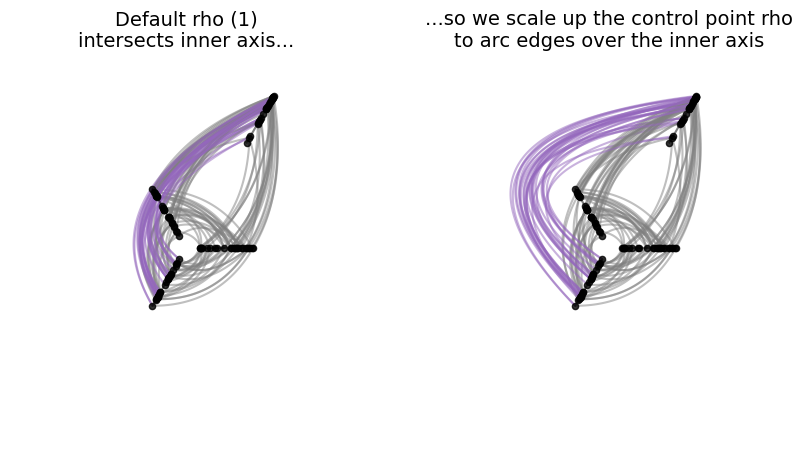

In [9]:
# interior axes will be the usual alignment that hive_plot_n_axes() can handle
hp = hive_plot_n_axes(
    node_list=nodes,
    edges=edges,
    axes_assignments=node_splits[:-1],
    sorting_variables=["low", "med", "high"],
    all_edge_kwargs={"color": "gray"},
)

# add an outer axis unaligned with inner axes
outer_axis = Axis(
    axis_id="outer",
    start=hp.axes["Group 1"].polar_start + 8,
    end=hp.axes["Group 1"].polar_end + 8,
    angle=hp.axes["Group 1"].angle + 60,
)
hp.add_axes(outer_axis)
hp.place_nodes_on_axis(
    axis_id="outer",
    unique_ids=node_splits[-1],
    sorting_feature_to_use="low",
)

# manual connections from well-behaved inner axes to outer axis
hp.connect_axes(edges=edges, axis_id_1="Group 2", axis_id_2="outer", color="gray")
hp.connect_axes(edges=edges, axis_id_1="Group 1", axis_id_2="outer", color="gray")


fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, control_rho_scale in enumerate([1, 2]):
    # make a copy of hive plot to make sure we draw edges on different HPs
    temp_hp = hp.copy()

    # manual connection of interest for changing control rho
    temp_hp.connect_axes(
        edges=edges,
        axis_id_1="Group 3",
        axis_id_2="outer",
        color="C4",
        control_rho_scale=control_rho_scale,
    )

    hive_plot_viz(
        temp_hp,
        show_axes_labels=False,
        fig=fig,
        ax=axes[i],
    )

axes[0].set_title(
    "Default rho (1)\nintersects inner axis...",
    size=14,
)
axes[1].set_title(
    "...so we scale up the control point rho\nto arc edges over the inner axis",
    size=14,
)

plt.show()

#### Shift Bézier Control Point Around Origin

By default, an edge in `hiveplotlib` is drawn between its associated start and end nodes with a [Bézier curve](https://en.wikipedia.org/wiki/B%C3%A9zier_curve) with a single *control point* at the median polar coordinate of the start and end nodes. One may want to alter this curvature by _shifting the control point **around** the origin_.

This capability can be changed via the `control_angle_shift` parameter in `hiveplotlib.HivePlot.connect_axes()`. This parameter shifts *counterclockwise* the single control point for each curve.

Values greater than 0 will shift the peaks of edges counterclockwise, while values less than 0 will shift the peaks of edges clockwise.

Below, we demonstrate calling `hiveplotlib.HivePlot.connect_axes()` using multiple values for `control_angle_shift` between $-45^\circ$ and $45^\circ$. We also include the default edges on each hive plot as a point of comparison.

In [10]:
# generate some example nodes and edges for axes
num_axes = 2
nodes, node_splits, edges = example_nodes_and_edges(num_axes=num_axes)

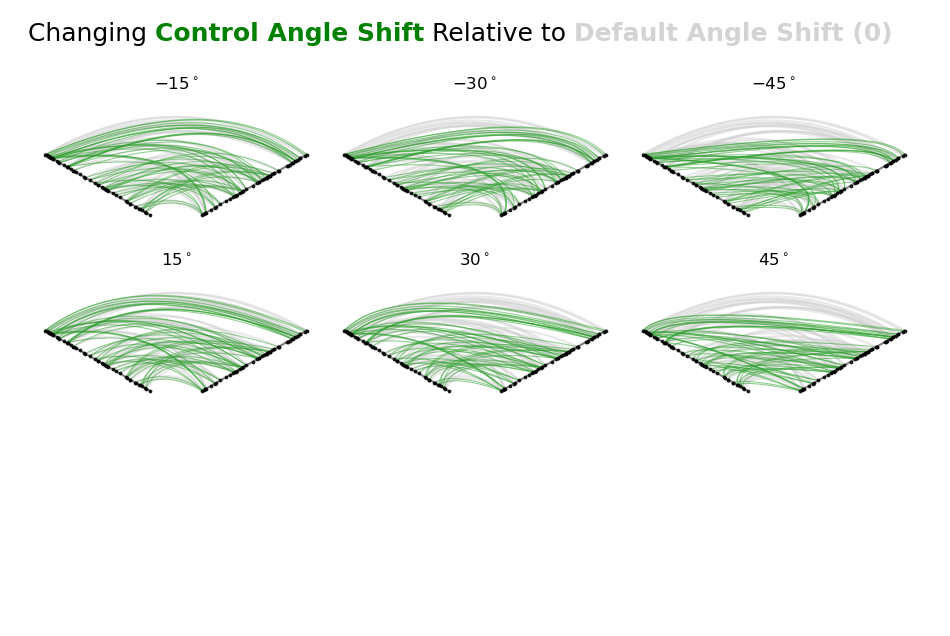

In [11]:
hp = HivePlot()
hp.add_nodes(nodes)

for i in range(num_axes):
    temp_axis = Axis(
        axis_id=i,
        start=1,
        end=5,
        angle=30 + 120 * i,
        long_name=f"Axis {i}",
    )
    hp.add_axes(temp_axis)
    hp.place_nodes_on_axis(
        axis_id=i,
        unique_ids=node_splits[i],
        sorting_feature_to_use="low",
    )

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# make default hp curves first
default_hp = hp.copy()

# manually connect our 2 axes
default_hp.connect_axes(
    edges=edges,
    axis_id_1=0,
    axis_id_2=1,
    a2_to_a1=False,
    color="lightgray",
    alpha=0.5,
)

control_angle_shifts = [-15, -30, -45, 15, 30, 45]

for i, control_angle_shift in enumerate(control_angle_shifts):
    # make a copy of hive plot to make sure we draw edges on different HPs
    temp_hp = hp.copy()

    # manually connect our 2 axes
    temp_hp.connect_axes(
        edges=edges,
        axis_id_1=0,
        axis_id_2=1,
        a2_to_a1=False,
        color="C2",
        control_angle_shift=control_angle_shift,
    )
    # plot default edges in gray
    edge_viz(
        default_hp,
        fig=fig,
        ax=axes.flatten()[i],
    )
    # plot angle-shifted edges on top
    hive_plot_viz(
        temp_hp,
        show_axes_labels=False,
        fig=fig,
        ax=axes.flatten()[i],
        lw=0.8,
        node_kwargs={"s": 3},
    )
    axes.flatten()[i].set_title(rf"${control_angle_shift}^\circ$", size=12, y=0.8)

# embed legend in the title
flexitext(
    x=0.5,
    y=0.85,
    s="<size:18>Changing <color:green, weight: bold>Control Angle Shift</> "
    "Relative to <color:lightgray, weight:bold>Default Angle Shift (0)</></>",
    xycoords="figure fraction",
    ha="center",
)

fig.subplots_adjust(hspace=-0.6, wspace=-0.1)

plt.show()

##### When Would One Use This?

A situation when this capability becomes not only relevant, but *necessary* would be when we move to *multiple layers* of hive plot axes, specifically when we have two hive plot axes *placed at the same angle*.

Since, by default, the control point of an edge uses the mean angle of the two axes corresponding to its start and end nodes, this leads to a control point that is *in line with the nodes*, resulting in straight edges on top of each other that are impossible to visually disentangle.

Below, we contrive an example of this with a standard 3-axis hive plot plus an outer axis aligned with one of the inner axes.

We highlight in red the edge curves that end up being straight lines with the default control point angle value.

We then demonstrate shifting the control point angle for the red edges, allowing us to see those edges in the final visualization.

In [12]:
# generate some example nodes and edges for axes
num_axes = 4
nodes, node_splits, edges = example_nodes_and_edges(num_axes=num_axes)

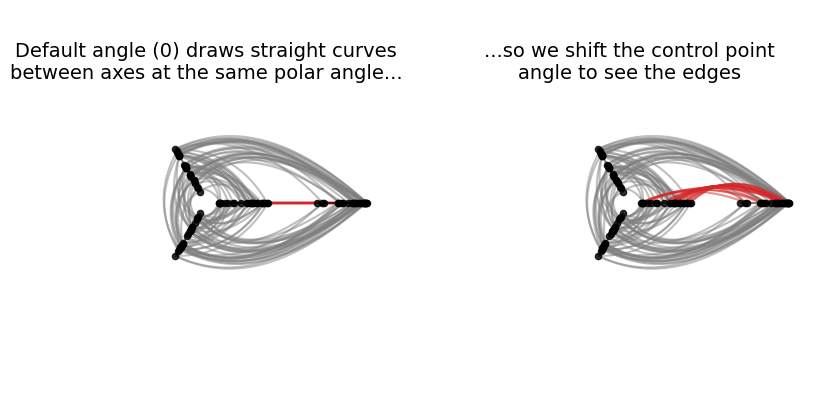

In [13]:
# interior axes will be the usual alignment that hive_plot_n_axes() can handle
hp = hive_plot_n_axes(
    node_list=nodes,
    edges=edges,
    axes_assignments=node_splits[:-1],
    sorting_variables=["low", "med", "high"],
    all_edge_kwargs={"color": "gray"},
)

# add an outer axis *aligned* with an inner axis
outer_axis = Axis(
    axis_id="outer",
    start=hp.axes["Group 1"].polar_start + 8,
    end=hp.axes["Group 1"].polar_end + 8,
    angle=hp.axes["Group 1"].angle,
)
hp.add_axes(outer_axis)
hp.place_nodes_on_axis(
    axis_id="outer",
    unique_ids=node_splits[-1],
    sorting_feature_to_use="low",
)

# manual connections from well-behaved inner axes to outer axis
hp.connect_axes(edges=edges, axis_id_1="Group 2", axis_id_2="outer", color="gray")
hp.connect_axes(edges=edges, axis_id_1="Group 3", axis_id_2="outer", color="gray")


fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for i, control_angle_shift in enumerate([0, 20]):
    # make a copy of hive plot to make sure we draw edges on different HPs
    temp_hp = hp.copy()

    # manual connection of interest for changing control angle
    temp_hp.connect_axes(
        edges=edges,
        axis_id_1="Group 1",
        axis_id_2="outer",
        color="C3",
        control_angle_shift=control_angle_shift,
    )

    hive_plot_viz(
        temp_hp,
        show_axes_labels=False,
        fig=fig,
        buffer=0.2,
        ax=axes[i],
    )

axes[0].set_title(
    "Default angle (0) draws straight curves\nbetween axes at the same polar angle...",
    size=14,
    y=0.8,
)
axes[1].set_title(
    "...so we shift the control point\nangle to see the edges",
    size=14,
    y=0.8,
)

plt.show()